In [11]:
!ls /group-volume/binfeng/misc/lmsys/model/llama3_8b_sft_2

checkpoint-179	checkpoint-358	checkpoint-537	checkpoint-716


In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://bart.sec.samsung.net/artifactory/api/pypi/pypi-remote/simple, https://pypi.python.org/simple
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 42.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.4 MB/s eta 0:00:00


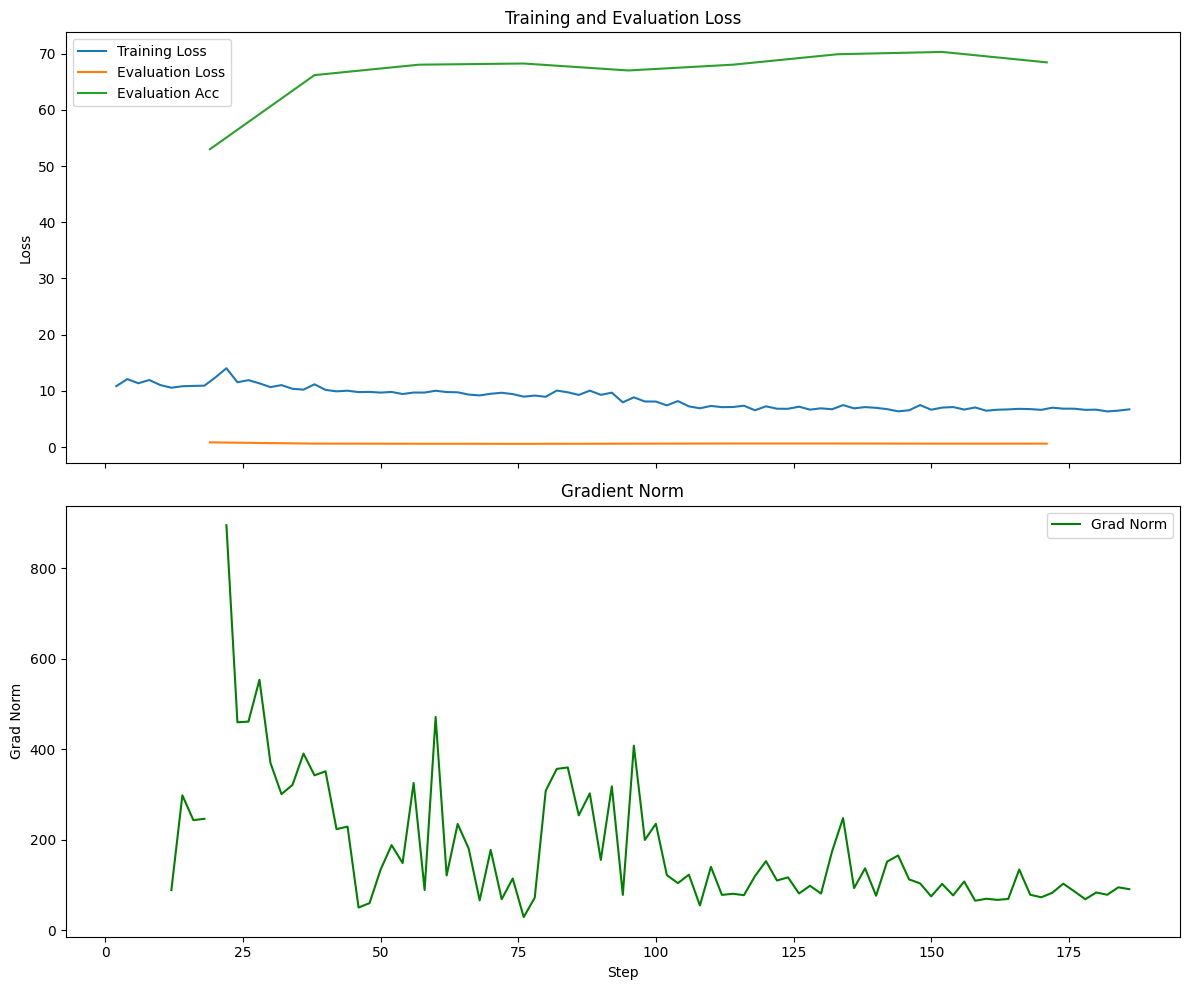

In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd

def vis_train_log(path):
    assert "trainer_state.json" in path, "trainer_state.json not in path"
    # Load the JSON data
    with open(path, 'r') as f:
        data = json.load(f)

    # Extract log history
    log_history = data['log_history']

    # Convert to DataFrame
    df = pd.DataFrame(log_history)

    loss_idx = df['loss'].notnull()
    eval_loss_idx = df['eval_loss'].notnull()
    grad_norm_idx = df['grad_norm'].notnull()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot losses
    ax1.plot(df['step'][loss_idx], df['loss'][loss_idx], label='Training Loss')
    ax1.plot(df['step'][eval_loss_idx], df['eval_loss'][eval_loss_idx], label='Evaluation Loss')
    ax1.plot(df['step'][eval_loss_idx], df['eval_acc'][eval_loss_idx]*100, label='Evaluation Acc')
    
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Evaluation Loss')
    ax1.legend()

    # Plot grad norm
    ax2.plot(df['step'][grad_norm_idx], df['grad_norm'][grad_norm_idx], label='Grad Norm', color='green')
    ax2.set_xlabel('Step')
    ax2.set_ylabel('Grad Norm')
    ax2.set_title('Gradient Norm')
    ax2.legend()

    plt.tight_layout()
    plt.show()


vis_train_log("/group-volume/binfeng/wsdm/ckpt/qwen14b_ft/checkpoint-186/trainer_state.json")

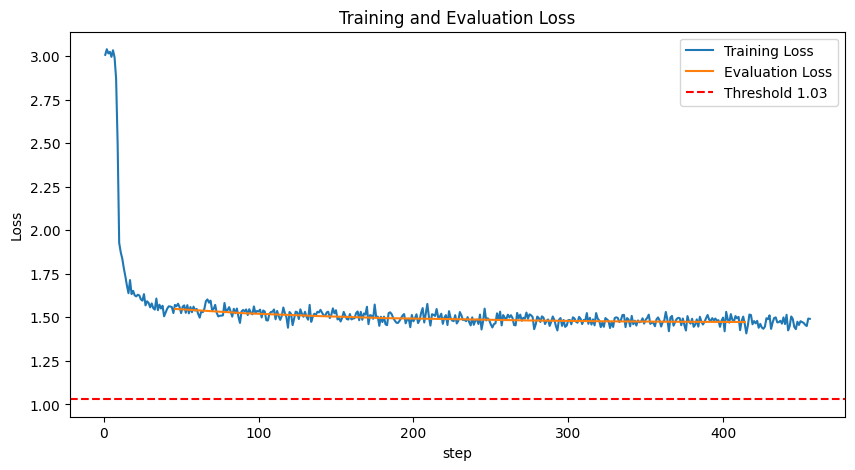

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# Load the JSON data
with open('/group-volume/binfeng/misc/lsm/model/bulla-8b/checkpoint-456/trainer_state.json', 'r') as f:
    data = json.load(f)

# Extract log history
log_history = data['log_history']

# Convert to DataFrame
df = pd.DataFrame(log_history)

loss_idx = df[(df['loss'].notnull())].index
eval_loss_idx = df[(df['eval_loss'].notnull())].index

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(df['step'][loss_idx], df['loss'][loss_idx], label='Training Loss')
plt.plot(df['step'][eval_loss_idx], df['eval_loss'][eval_loss_idx], label='Evaluation Loss')
plt.axhline(y=1.03, color='r', linestyle='--', label='Threshold 1.03')

plt.xlabel('step')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.show()

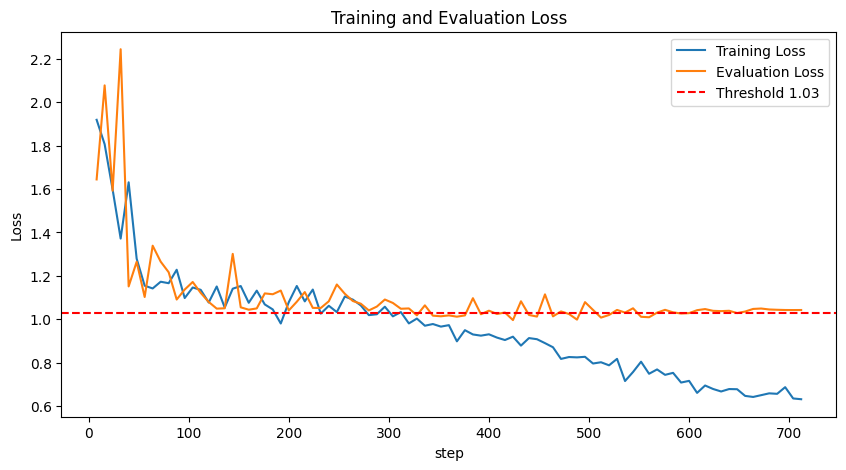

In [15]:
import json
import matplotlib.pyplot as plt
import pandas as pd

# Load the JSON data
with open('/group-volume/binfeng/misc/lmsys/model/gemma2_9b_sft_2/checkpoint-716/trainer_state.json', 'r') as f:
    data = json.load(f)

# Extract log history
log_history = data['log_history']

# Convert to DataFrame
df = pd.DataFrame(log_history)

loss_idx = df[(df['loss'].notnull()) & (df['epoch'] < 3)].index
eval_loss_idx = df[(df['eval_loss'].notnull()) & (df['epoch'] < 3)].index

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(df['step'][loss_idx], df['loss'][loss_idx], label='Training Loss')
plt.plot(df['step'][eval_loss_idx], df['eval_loss'][eval_loss_idx], label='Evaluation Loss')
plt.axhline(y=1.03, color='r', linestyle='--', label='Threshold 1.03')
plt.xlabel('step')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.show()

In [13]:
df['loss']

0      2.6852
1         NaN
2      1.2544
3         NaN
4      1.1757
        ...  
191       NaN
192    0.0182
193       NaN
194    0.0138
195       NaN
Name: loss, Length: 196, dtype: float64

In [21]:
import numpy as np
from sklearn.metrics import log_loss
#dummy loss
truth = [0,1,0]
pred = [1/3, 1/3, 1/3]
log_loss = log_loss(truth, pred)
print(log_loss)

0.6365141682948128
0.3662040962227033
